<a href="https://colab.research.google.com/github/Joeksef/Bank-Fraud-Detection/blob/main/Boston_House_Prediction_Project_by_Joseph_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the two Data sets and visualizing the results

In [ ]:
# Import the Train dataset
df1 = pd.read_csv('Boston_Train.csv')
df1.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Import the Test dataset
df2 = pd.read_csv('Boston_Test.csv')
df2.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,351,0.07950,60,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,352,0.07244,60,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,353,0.01709,90,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
3,354,0.04301,80,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
4,355,0.10659,80,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6


Preprocessing of the two datasets

In [ ]:
# Shape of Train dataset
print('Shape of Training dataset:', df1.shape)
# Checking for null values in training dataset
df1.isnull().sum()

Shape of Training dataset: (351, 15)


Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [ ]:
# Shape of Test dataset
print('Shape of Testing dataset:', df2.shape)
# Checking for null values in training dataset
df2.isnull().sum()

Shape of Testing dataset: (155, 15)


Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [ ]:
# Since the medv column is the target column, lets change ‘medv’ column name to 'Price' to avoid confusion
df1.rename(columns={'medv': 'Price'}, inplace=True)
df2.rename(columns={'medv': 'Price'}, inplace=True)

In [ ]:
df1.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df2.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,351,0.07950,60,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,352,0.07244,60,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,353,0.01709,90,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
3,354,0.04301,80,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
4,355,0.10659,80,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6


In [ ]:
# Information about the dataset features
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  351 non-null    int64  
 1   crim        351 non-null    float64
 2   zn          351 non-null    float64
 3   indus       351 non-null    float64
 4   chas        351 non-null    int64  
 5   nox         351 non-null    float64
 6   rm          351 non-null    float64
 7   age         351 non-null    float64
 8   dis         351 non-null    float64
 9   rad         351 non-null    int64  
 10  tax         351 non-null    int64  
 11  ptratio     351 non-null    float64
 12  black       351 non-null    float64
 13  lstat       351 non-null    float64
 14  Price       351 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 41.3 KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  155 non-null    int64  
 1   crim        155 non-null    float64
 2   zn          155 non-null    int64  
 3   indus       155 non-null    float64
 4   chas        155 non-null    int64  
 5   nox         155 non-null    float64
 6   rm          155 non-null    float64
 7   age         155 non-null    float64
 8   dis         155 non-null    float64
 9   rad         155 non-null    int64  
 10  tax         155 non-null    int64  
 11  ptratio     155 non-null    float64
 12  black       155 non-null    float64
 13  lstat       155 non-null    float64
 14  Price       155 non-null    float64
dtypes: float64(10), int64(5)
memory usage: 18.3 KB


In [ ]:
#Drop the second column since its of no use to the dataset, to avoid data that will affect Model precision
df1.drop(axis = 1, columns = 'Unnamed: 0', inplace = True)
df2.drop(axis = 1, columns = 'Unnamed: 0', inplace = True)

In [ ]:
# Describe
df1.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.401659,15.327635,8.435670,0.076923,0.510737,6.403900,60.817949,4.420862,4.472934,310.344729,17.707692,380.489174,10.407692,25.062678
std,0.641716,25.605040,6.088947,0.266850,0.102256,0.676424,28.393094,1.968666,1.615543,67.577707,2.198252,40.455904,5.888639,8.461918
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,11.800000
25%,0.057845,0.000000,4.025000,0.000000,0.437450,5.949500,36.150000,2.768500,4.000000,264.000000,16.100000,383.670000,6.095000,19.500000
50%,0.132620,0.000000,6.200000,0.000000,0.493000,6.266000,62.000000,4.095200,4.000000,304.000000,17.900000,392.690000,9.380000,22.900000
75%,0.404865,22.000000,10.010000,0.000000,0.544000,6.733000,88.450000,5.871800,5.000000,358.000000,19.100000,396.220000,13.210000,28.700000
max,4.097400,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000,50.000000


In [ ]:
df2.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,10.886843,2.387097,17.253484,0.051613,0.654239,6.014555,86.140645,2.377864,21.045161,629.916129,20.149032,302.744258,17.737742,16.803871
std,12.842318,13.294070,3.973223,0.221961,0.076748,0.687848,17.844278,1.678612,7.137192,107.071159,0.475281,139.254349,7.134484,8.186613
min,0.017090,0.000000,1.690000,0.000000,0.410000,3.561000,18.500000,1.129600,1.000000,187.000000,17.000000,0.320000,2.960000,5.000000
25%,4.385535,0.000000,18.100000,0.000000,0.591000,5.695000,81.900000,1.643250,24.000000,666.000000,20.200000,288.690000,13.335000,11.750000
50%,7.839320,0.000000,18.100000,0.000000,0.679000,6.112000,92.600000,2.004800,24.000000,666.000000,20.200000,378.380000,17.270000,15.100000
75%,13.441000,0.000000,18.100000,0.000000,0.713000,6.414000,98.250000,2.501600,24.000000,666.000000,20.200000,396.555000,21.945000,20.600000
max,88.976200,90.000000,27.740000,1.000000,0.770000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Exploratory Data Analysis of the two datasets

In [ ]:
# Finding out the correlation between the features
corr1 = df1.corr()
corr1.shape

(14, 14)

In [ ]:
corr2 = df2.corr()
corr2.shape

(14, 14)

<AxesSubplot:>

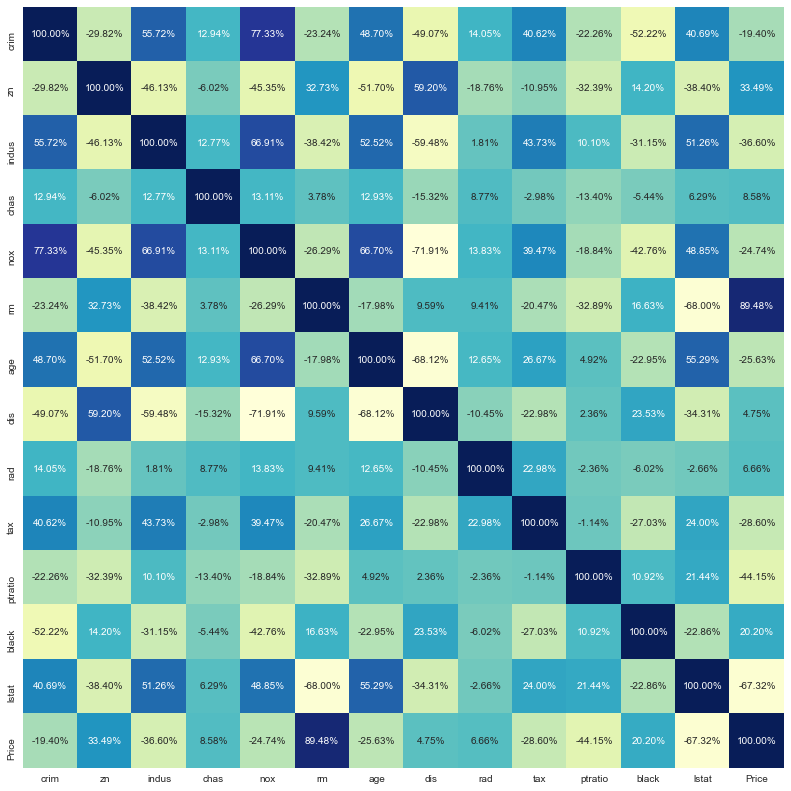

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(14,14))
sns.heatmap(corr1, cbar=False, square= True, fmt= '0.2%', annot=True, cmap= 'YlGnBu')

<AxesSubplot:>

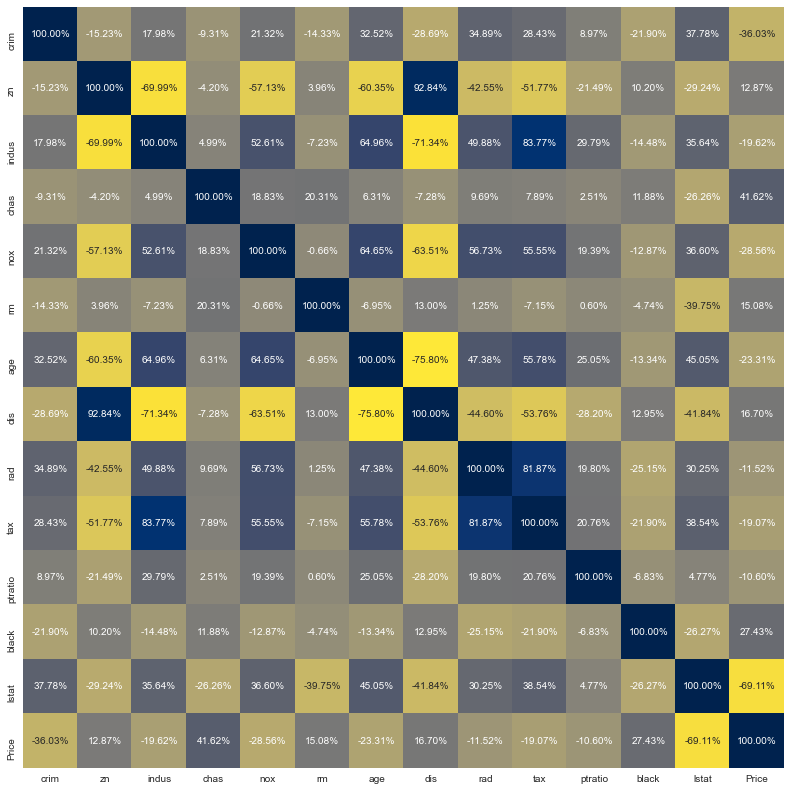

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(14,14))
sns.heatmap(corr2, cbar=False, square= True, fmt= '0.2%', annot=True, cmap= 'cividis_r')

<AxesSubplot:>

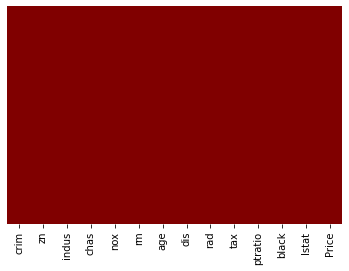

In [ ]:
# Checking for null values using heatmap
sns.heatmap(df1.isnull(), yticklabels=False, cbar = False, cmap = 'seismic_r')

<AxesSubplot:>

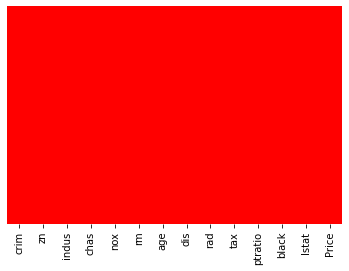

In [ ]:
# Checking for null values using heatmap
sns.heatmap(df2.isnull(), yticklabels=False, cbar = False, cmap = 'autumn')

obviously, the two datasets has no null value. So, let's explore the data more by plotting some of the columns

<AxesSubplot:xlabel='rad', ylabel='count'>

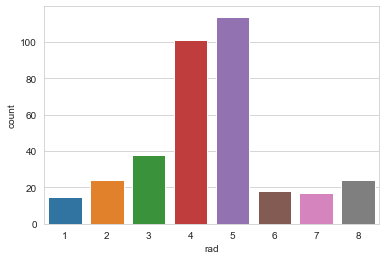

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'rad', data = df1)

<AxesSubplot:xlabel='rad', ylabel='count'>

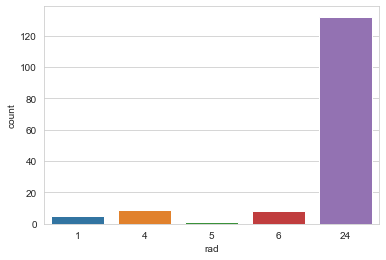

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'rad', data = df2)

<AxesSubplot:xlabel='chas', ylabel='count'>

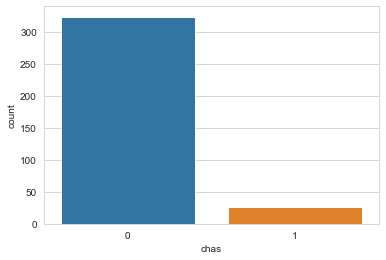

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'chas', data = df1)

<AxesSubplot:xlabel='chas', ylabel='count'>

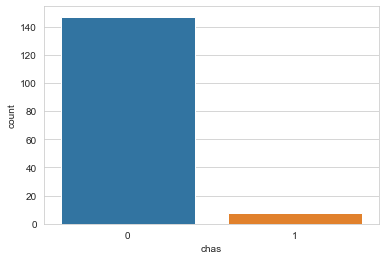

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'chas', data = df2)

<AxesSubplot:xlabel='chas', ylabel='count'>

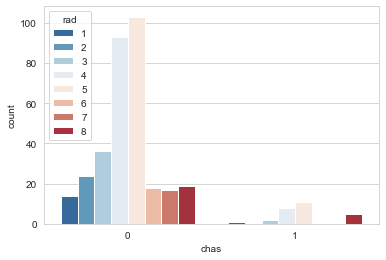

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'chas', hue = 'rad', palette = 'RdBu_r', data = df1)

<AxesSubplot:xlabel='chas', ylabel='count'>

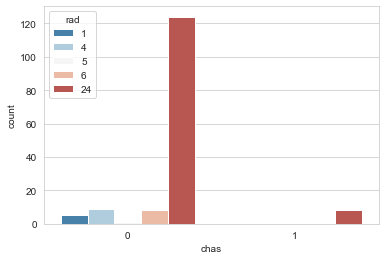

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'chas', hue = 'rad', palette = 'RdBu_r', data = df2)

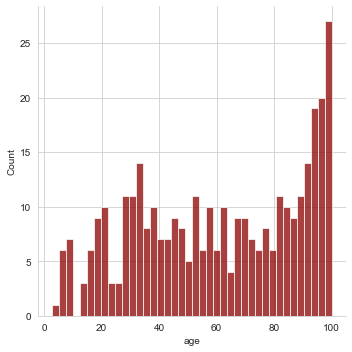

In [ ]:
sns.displot(df1['age'].dropna(), kde = False, color = 'darkred', bins=40)

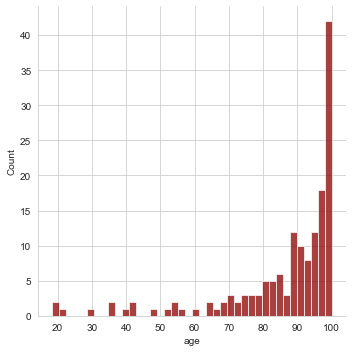

In [ ]:
sns.displot(df2['age'].dropna(), kde = False, color = 'darkred', bins=40)

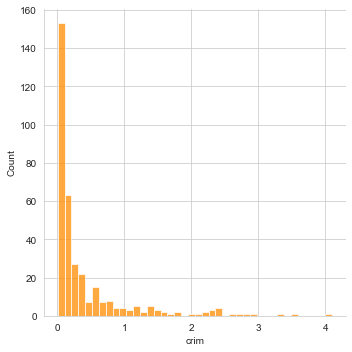

In [ ]:
sns.displot(df1['crim'].dropna(), kde = False, color = 'darkorange', bins=40)

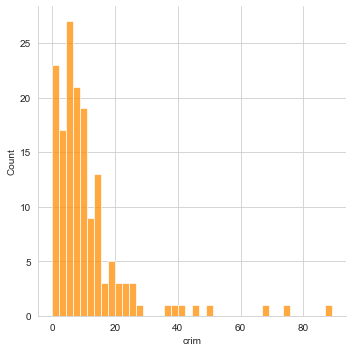

In [ ]:
sns.displot(df2['crim'].dropna(), kde = False, color = 'darkorange', bins=40)

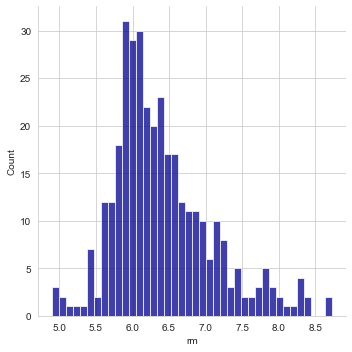

In [ ]:
sns.displot(df1['rm'].dropna(), kde = False, color = 'darkblue', bins=40)

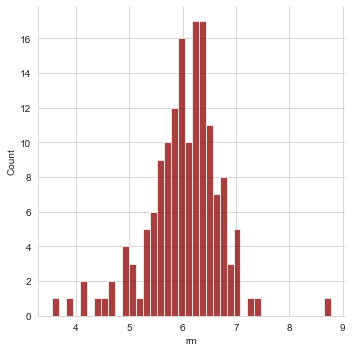

In [ ]:
sns.displot(df2['rm'].dropna(), kde = False, color = 'darkred', bins=40)

Model Training

In [ ]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_train = df1.iloc[:,0:13] #independent columns
y_train= df1.iloc[:,-1] #target column i.e price range
X_test = df2.iloc[:,0:13]
y_test = df2.iloc[:,-1]

In [ ]:
y_train = np.round(df1['Price'])
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func = chi2, k = 5)
fit1 = bestfeatures.fit(X_train, y_train)
df1scores = pd.DataFrame(fit1.scores_)
df1columns = pd.DataFrame(X_train.columns)
# Concat two dataframes for better visualization
featureScores1 = pd.concat([df1columns, df1scores], axis = 1)
featureScores1.columns = ['Specs', 'Score'] #naming the dataframe columns
featureScores1

,Specs,Score
0,crim,116.409048
1,zn,3360.496357
2,indus,426.640225
3,chas,33.428537
4,nox,2.280787
5,rm,20.688799
6,age,1575.417982
7,dis,44.701259
8,rad,23.356787
9,tax,932.795817


In [ ]:
y_test = np.round(df2['Price'])
bestfeatures = SelectKBest(score_func = chi2, k = 5)
fit2 = bestfeatures.fit(X_test, y_test)
df2scores = pd.DataFrame(fit2.scores_)
df2columns = pd.DataFrame(X_test.columns)
# Concat two dataframes for better visualization
featureScores2 = pd.concat([df2columns, df2scores], axis = 1)
featureScores2.columns = ['Specs', 'Score'] #naming the dataframe columns
featureScores2

,Specs,Score
0,crim,992.629162
1,zn,2608.513514
2,indus,38.964436
3,chas,45.904018
4,nox,0.394625
5,rm,2.172376
6,age,234.160457
7,dis,63.319248
8,rad,79.067299
9,tax,857.637005


In [ ]:
print(featureScores1.nlargest(5, 'Score')) #print 5 best features

    Specs        Score
1      zn  3360.496357
6     age  1575.417982
9     tax   932.795817
12  lstat   756.911851
2   indus   426.640225


In [ ]:
print(featureScores2.nlargest(5, 'Score')) #print 5 best features

    Specs        Score
1      zn  2608.513514
11  black  2077.285425
0    crim   992.629162
9     tax   857.637005
12  lstat   281.153979


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model1 = ExtraTreesClassifier()
model1.fit(X_train, y_train)

ExtraTreesClassifier()

In [ ]:
print(model1.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.11357703 0.03224779 0.05087611 0.01569625 0.05356698 0.14577219
 0.1157868  0.09082806 0.04327469 0.05291984 0.05692741 0.0996912
 0.12883565]


In [ ]:
model2 = ExtraTreesClassifier()
model2.fit(X_test, y_test)

ExtraTreesClassifier()

In [ ]:
print(model2.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.13512921 0.00247646 0.01003552 0.01405762 0.10325097 0.13341679
 0.13510969 0.14719959 0.00758823 0.01217007 0.01019485 0.12522731
 0.16414371]


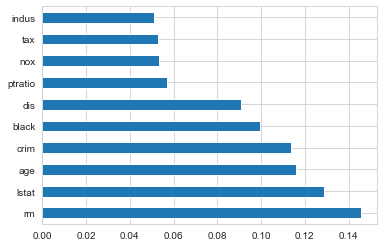

In [ ]:
# Plot graph of feature importances for better visualization
feat_importances1 = pd.Series(model1.feature_importances_, index = X_train.columns)
feat_importances1.nlargest(10).plot(kind = 'barh')
plt.show()

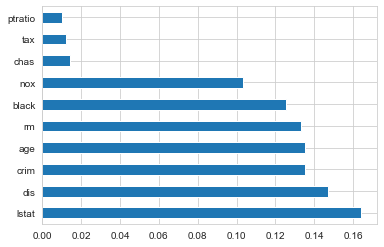

In [ ]:
# Plot graph of feature importances for better visualization
feat_importances2 = pd.Series(model2.feature_importances_, index = X_train.columns)
feat_importances2.nlargest(10).plot(kind = 'barh')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = model.predict(X_train)
print("Training Accuracy:", model.score(X_train, y_train)*100)

Training Accuracy: 87.56053366147184


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Model Accuracy:", r2_score(y_train, model.predict(X_train))*100)

Model Accuracy: 87.56053366147184


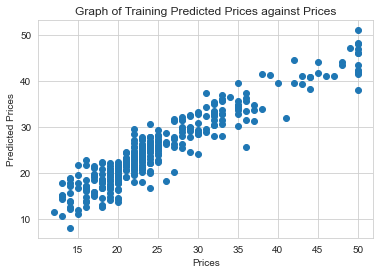

In [ ]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Graph of Training Predicted Prices against Prices")
plt.show()

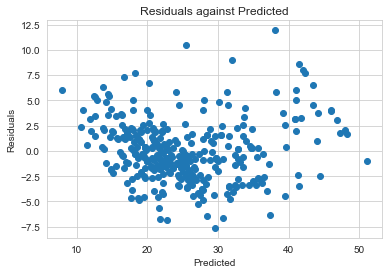

In [ ]:
# Checking residuals
plt.scatter(y_train_pred, y_train-y_train_pred)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals against Predicted")
plt.show()

C:\Users\TEEVES 3\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


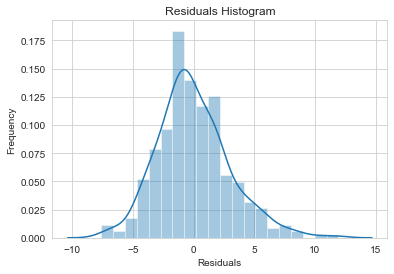

In [ ]:
# Checking Normality of errors
sns.distplot(y_train-y_train_pred)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Histogram")
plt.show()

In [ ]:
model.fit(X_test, y_test)
y_test_pred = model.predict(X_test)
print("Testing Accuracy:", model.score(X_test, y_test)*100)

Testing Accuracy: 68.71087210653639


In [ ]:
print("Model Accuracy:", r2_score(y_test, model.predict(X_test))*100)

Model Accuracy: 68.71087210653639


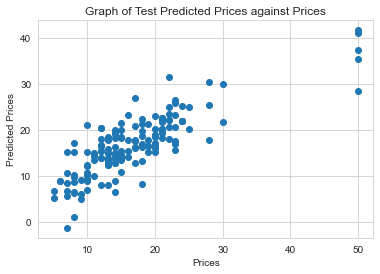

In [ ]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Graph of Test Predicted Prices against Prices")
plt.show()

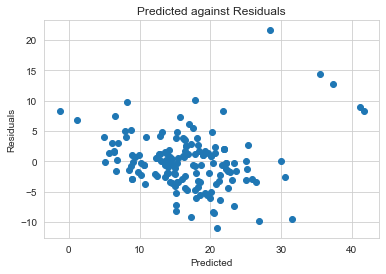

In [ ]:
# Checking residuals
plt.scatter(y_test_pred, y_test - y_test_pred)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Predicted against Residuals")
plt.show()

C:\Users\TEEVES 3\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


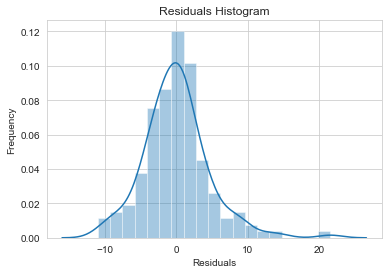

In [ ]:
# Checking Normality of errors
sns.distplot(y_test - y_test_pred)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Histogram")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_train_pred = reg.predict(X_train)
print("Training Accuracy:", reg.score(X_train, y_train)*100)

Training Accuracy: 98.59005181774381


In [ ]:
reg.fit(X_test, y_test)
y_test_pred = reg.predict(X_test)
print("Testing Accuracy:", reg.score(X_test, y_test)*100)

Testing Accuracy: 96.7682957636518


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Model Accuracy:", r2_score(y_test, model.predict(X_test))*100)

Model Accuracy: 68.71087210653639


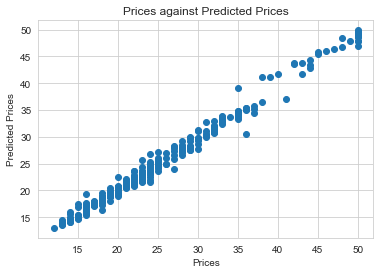

In [ ]:
# Visualizing the differences between th actual Prices and the predicted prices
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices against Predicted Prices")
plt.show()

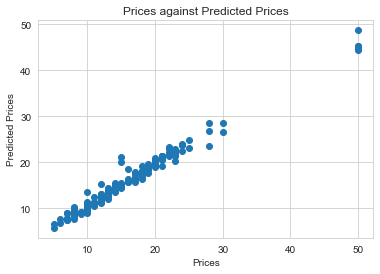

In [ ]:
# Visualizing the differences between th actual Prices and the predicted prices
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices against Predicted Prices")
plt.show()

**PREDICTION AND FINAL  SCORE**

*Linear Regression Score:

Model Score: 87.56% Accuracy
Training Accuracy: 87.56% Accuracy
Testing Accuracy: 68.71% Accuracy

*Random Forest Regressor Score:

Model Score: 99.99% Accuracy
Training Accuracy: 98.62% Accuracy.
Testing Accuracy: 96.92% Accuracy